In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("churn_data.xlsx")

In [4]:
df.shape

(7043, 33)

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df["City"].nunique()
df.duplicated(subset="City").sum()

np.int64(5914)

In [6]:
df["Count"].value_counts()
df = df.drop(columns=["Count"])

In [7]:
df["State"].value_counts
df = df.drop(columns=["State"])

In [8]:
df["Churn Label"].value_counts()
df["Churn Label"].value_counts(normalize=True) * 100

Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [9]:
df["Churn Value"].value_counts()
df["Churn Value"].mean()

np.float64(0.2653698707936959)

In [10]:
pd.crosstab(df["Gender"], df["Churn Label"]) * 100

Churn Label,No,Yes
Gender,,
Female,254900,93900
Male,262500,93000


In [13]:
pd.crosstab(df["Senior Citizen"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Senior Citizen,,
No,76.393832,23.606168
Yes,58.318739,41.681261


In [14]:
pd.crosstab(df["Partner"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


In [15]:
pd.crosstab(df["Dependents"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Dependents,,
No,67.448301,32.551699
Yes,93.484942,6.515058


In [16]:
df["Tenure Months"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: Tenure Months, dtype: float64

In [17]:
df["tenure_group"] = pd.cut(
    df["Tenure Months"],
    bins=[0, 6, 12, 24, 48, 72],
    labels=["0-6mo", "6-12mo", "1-2yr", "2-4yr", "4-6yr"]
)

pd.crosstab(df["tenure_group"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
tenure_group,,
0-6mo,46.666667,53.333333
6-12mo,64.113475,35.886525
1-2yr,71.289062,28.710938
2-4yr,79.611041,20.388959
4-6yr,90.486824,9.513176


In [18]:
pd.crosstab(df["Contract"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [19]:
pd.crosstab(df["Payment Method"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Payment Method,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [20]:
pd.crosstab(df["Paperless Billing"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Paperless Billing,,
No,83.669916,16.330084
Yes,66.434908,33.565092


In [21]:
pd.crosstab(df["Tech Support"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Tech Support,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


In [22]:
pd.crosstab(df["Device Protection"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Device Protection,,
No,60.872375,39.127625
No internet service,92.595020,7.404980
Yes,77.497936,22.502064


In [23]:
pd.crosstab(df["Online Security"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Online Security,,
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


In [24]:
pd.crosstab(df["Streaming Movies"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Streaming Movies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435


In [25]:
pd.crosstab(df["Streaming TV"], df["Churn Label"], normalize="index") * 100

Churn Label,No,Yes
Streaming TV,,
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188


C:\Users\adity\AppData\Local\Temp\ipykernel_25496\976296035.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_tenure, yes_tenure], labels=["No Churn", "Churn"])


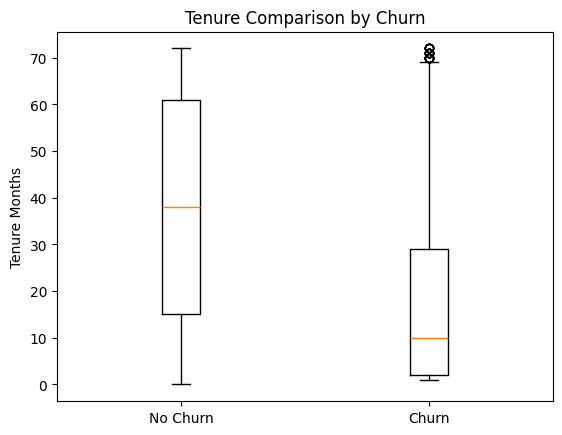

In [26]:
yes_tenure = df[df["Churn Label"]=="Yes"]["Tenure Months"]
no_tenure  = df[df["Churn Label"]=="No"]["Tenure Months"]

plt.figure()
plt.boxplot([no_tenure, yes_tenure], labels=["No Churn", "Churn"])
plt.title("Tenure Comparison by Churn")
plt.ylabel("Tenure Months")
plt.show()

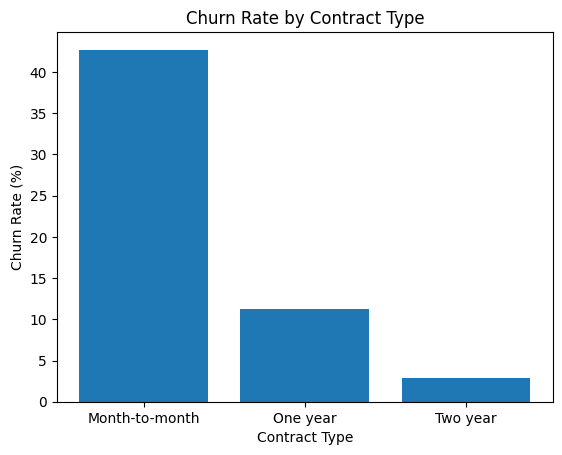

In [27]:
contract_churn = pd.crosstab(df["Contract"], df["Churn Label"], normalize="index") * 100

plt.figure()
plt.bar(contract_churn.index, contract_churn["Yes"])
plt.title("Churn Rate by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")
plt.show()

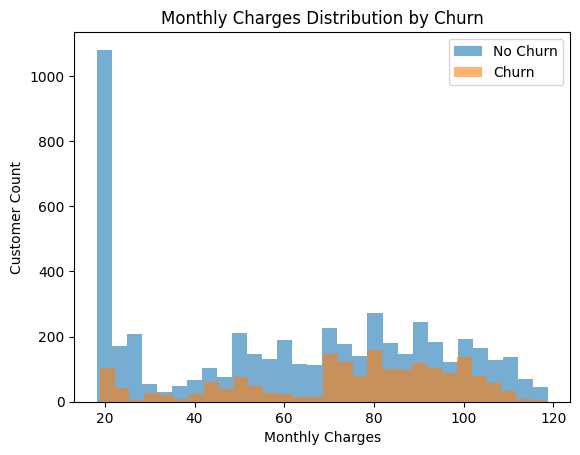

In [28]:
yes_charge = df[df["Churn Label"]=="Yes"]["Monthly Charges"]
no_charge  = df[df["Churn Label"]=="No"]["Monthly Charges"]

plt.figure()
plt.hist(no_charge, bins=30, alpha=0.6, label="No Churn")
plt.hist(yes_charge, bins=30, alpha=.6, label="Churn")
plt.title("Monthly Charges Distribution by Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Customer Count")
plt.legend()
plt.show()

Churn Label                       No        Yes
Payment Method                                 
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


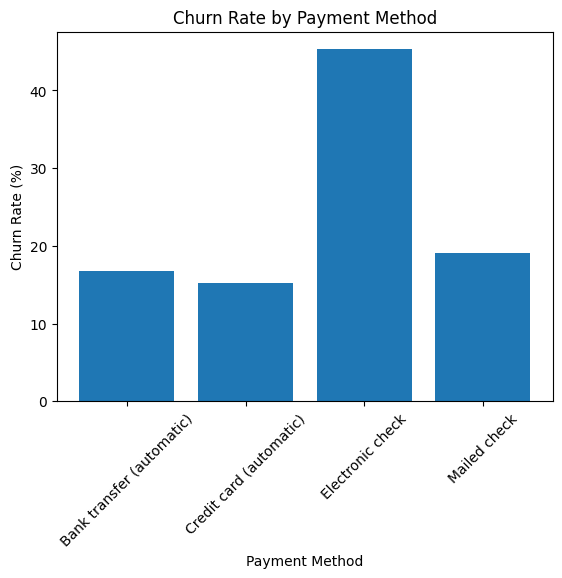

In [29]:
payment_churn = pd.crosstab(df["Payment Method"], df["Churn Label"], normalize="index") * 100
print(payment_churn)
plt.figure()
plt.bar(payment_churn.index, payment_churn["Yes"])
plt.title("Churn Rate by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Churn Rate (%)")
plt.xticks(rotation=45)
plt.show()

In [30]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

print(coef_df.head(10))
print(coef_df.tail(10))

NameError: name 'X' is not defined